More pandas basics
==================

In this lesson, we will build on our ability to use Pandas data frames and start to take a look at some other data analysis tasks.

Let's start by reading some data into our python session. The file [marineSTX.csv](marineSTX.csv) contains ocean and wind observations in the US Virgin Islands during July 2018 in CSV format.
We will read it just like last time using the `read_csv()` function built into Pandas.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('marineSTX.csv')

Remember, we can get some quick information about the dataset by accessing a few of it's attributes:

In [2]:
data.head()

,Identification,Latitude,Longitude,Time of Observation,Ice Accretion On Ship,Thickness of Ice Accretion On Ship,Rate of Ice Accretion on Ship,Sea Level Pressure,Characteristics of Pressure Tendency,Pressure Tendency,...,Cloud Height Indicator,Cloud Height,Middle Cloud Type,High Cloud Type,Visibility,Visibility Indicator,Present Weather,Past Weather,Wind Direction,Wind Speed
0,CHSV3,17.8,295.3,2018-07-01T00:06:00,,,,,,,...,,A,,,,,,,40,3.6
1,CHSV3,17.8,295.3,2018-07-01T00:12:00,,,,,,,...,,A,,,,,,,40,3.1
2,CHSV3,17.8,295.3,2018-07-01T00:18:00,,,,,,,...,,A,,,,,,,30,4.1
3,CHSV3,17.8,295.3,2018-07-01T00:24:00,,,,,,,...,,A,,,,,,,50,2.6
4,CHSV3,17.8,295.3,2018-07-01T00:30:00,,,,1017.40,,,...,,,,,,,,,41,3.4


In [3]:
data.shape

(7383, 33)

This dataset has 33 columns, which correspond to the different types of measurements made as well as some information that describes the data (station ID, position, time). There are 7383 measurements total, one measurement every 6 minutes or so. I can quickly tell that I might have some missing measurements because if there were always 1 measurement every 6 minutes, I'd expect 10 measurements each hour and thus

In [4]:
31*24*10

7440

7440 or so total measurements. So, there must be either some missing observations. In this case, I am lucky in that I can see pretty easily that some of those measurements occur at the end of the time period of interest

In [5]:
data.tail()

,Identification,Latitude,Longitude,Time of Observation,Ice Accretion On Ship,Thickness of Ice Accretion On Ship,Rate of Ice Accretion on Ship,Sea Level Pressure,Characteristics of Pressure Tendency,Pressure Tendency,...,Cloud Height Indicator,Cloud Height,Middle Cloud Type,High Cloud Type,Visibility,Visibility Indicator,Present Weather,Past Weather,Wind Direction,Wind Speed
7378,CHSV3,17.8,295.3,2018-07-31T22:54:00,,,,,,,...,,,,,,,,,,
7379,CHSV3,17.8,295.3,2018-07-31T23:00:00,,,,1017.50,,,...,,,,,,,,,86,1.9
7380,CHSV3,17.8,295.3,2018-07-31T23:24:00,,,,,,,...,,,,,,,,,,
7381,CHSV3,17.8,295.3,2018-07-31T23:30:00,,,,1017.60,,,...,,,,,,,,,57,2.5
7382,CHSV3,17.8,295.3,2018-07-31T23:54:00,,,,,,,...,,,,,,,,,,


It doesn't really matter though. My dataset is pretty nearly complete. As it is, many measurements are missing. For our purposes, it might make sense to create a dataframe that only contains columns that we are interested in. To do that, I need to take a look at all of the measurements types.

In [6]:
print(data.columns)

Index(['Identification', 'Latitude', 'Longitude', 'Time of Observation',
       'Ice Accretion On Ship', 'Thickness of Ice Accretion On Ship',
       'Rate of Ice Accretion on Ship', 'Sea Level Pressure',
       'Characteristics of Pressure Tendency', 'Pressure Tendency',
       'Air Temperature', 'Wet Bulb Temperature', 'Dew Point Temperature',
       'Sea Surface Temperature', 'Wave Direction', 'Wave Period',
       'Wave Height', 'Swell Direction', 'Swell Period', 'Swell Height',
       'Total Cloud Amount', 'Low Cloud Amount', 'Low Cloud Type',
       'Cloud Height Indicator', 'Cloud Height', 'Middle Cloud Type',
       'High Cloud Type', 'Visibility', 'Visibility Indicator',
       'Present Weather', 'Past Weather', 'Wind Direction', 'Wind Speed'],
      dtype='object')


When we used `describe()` we couldn't see all of the columns.

Replacing data in a data frame
------------------------------

One of the issues with our dataset is there are a bunch of blank entries. Because of the way the data were formatted in the file that we read, we are getting some false information about our data. For example, we know there are 7383 rows total, but it is clear that there aren't that many data points for any of the columns. Let's look at ice accretion as an example:

In [7]:
data['Ice Accretion On Ship'].count()

7383

This is problematic as we probably want to know exactly how many data points there are. The specific issue here is that missing data was entered as a blank string ('   '):

In [8]:
data['Ice Accretion On Ship'][0]

' '

Pandas sees that there is a string and doesn't much care that it is blank, so it thinks we have good data there. The best way to handle this is to convert all cells that are only blank strings to a `numpy.nan`. Pandas knows to ignore those values when doing calculations. We can do this using the `replace()` method of the data frame.

In [9]:
data = data.replace(r'^\s*$', np.nan, regex=True)
data.head()

,Identification,Latitude,Longitude,Time of Observation,Ice Accretion On Ship,Thickness of Ice Accretion On Ship,Rate of Ice Accretion on Ship,Sea Level Pressure,Characteristics of Pressure Tendency,Pressure Tendency,...,Cloud Height Indicator,Cloud Height,Middle Cloud Type,High Cloud Type,Visibility,Visibility Indicator,Present Weather,Past Weather,Wind Direction,Wind Speed
0,CHSV3,17.8,295.3,2018-07-01T00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,40,3.6
1,CHSV3,17.8,295.3,2018-07-01T00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,40,3.1
2,CHSV3,17.8,295.3,2018-07-01T00:18:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,30,4.1
3,CHSV3,17.8,295.3,2018-07-01T00:24:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,50,2.6
4,CHSV3,17.8,295.3,2018-07-01T00:30:00,NaN,NaN,NaN,1017.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,3.4


The syntax of `replace()` is pretty simple. The first argument is the thing that you want to 
replace and the second argument is the thing that you want to replace it with. The tricky bit here 
is I am using a *regular expression* to tell pandas what I want to replace (and I have to 
let pandas know that by setting `regex=True`. Regular expressions are sequences of characters that 
can be used to replace longer strings. We don't need to know the details of how to use them here as it is beyond the scope of this lesson. The reason that we need them is to tell pandas that we want to replace cells that have any number of spaces (0, 1, 2, 100, ...) with `NaN` (which, BTW, stands for not a number). That's what the first argument in the call to `replace()` is doing.

With that done, our count should be a little better:

In [10]:
data['Ice Accretion On Ship'].count()

0

Yep, no data in that column. That's good to know! Let's look at a column that does have some data.

In [11]:
data['Sea Surface Temperature'].count()

5803

Data type conversion
--------------------

The next issue that is common when we do a quick `read_csv()` is that we might need to change the type of our data. In this example, all of the data in our csv file was formatted as a string, even though most of it should be numerical data. So, we need to handle that.

In [12]:
data['Sea Surface Temperature'].dtypes

dtype('O')

`dtype('O')` is pandas tells us the data is a string.

The best way to do this is by column using the `astype()` method:

In [13]:
data['Sea Surface Temperature'] = data['Sea Surface Temperature'].astype(float)
data['Sea Surface Temperature'].dtypes

dtype('float64')

Now, we have a column full of floats (64 bit floats, which is a normal float for python). Note that this action didn't change our count:

In [14]:
data['Sea Surface Temperature'].count()

5803

We will be using the 'Air Temperature' column as well, so let's convert that too.

In [15]:
data['Air Temperature'] = data['Air Temperature'].astype(float)

Basic Calculations
------------------

One of the most basic operations that we might want to do is to perform some calculations between rows. For example, I might want to calculate the difference between two columns and save that data in a new column. To do that, we need to create a new column and give it a starting value.

In [16]:
data['Temperature Difference'] = np.nan
data.columns

Index(['Identification', 'Latitude', 'Longitude', 'Time of Observation',
       'Ice Accretion On Ship', 'Thickness of Ice Accretion On Ship',
       'Rate of Ice Accretion on Ship', 'Sea Level Pressure',
       'Characteristics of Pressure Tendency', 'Pressure Tendency',
       'Air Temperature', 'Wet Bulb Temperature', 'Dew Point Temperature',
       'Sea Surface Temperature', 'Wave Direction', 'Wave Period',
       'Wave Height', 'Swell Direction', 'Swell Period', 'Swell Height',
       'Total Cloud Amount', 'Low Cloud Amount', 'Low Cloud Type',
       'Cloud Height Indicator', 'Cloud Height', 'Middle Cloud Type',
       'High Cloud Type', 'Visibility', 'Visibility Indicator',
       'Present Weather', 'Past Weather', 'Wind Direction', 'Wind Speed',
       'Temperature Difference'],
      dtype='object')

You can see that my column has been added. I filled it with NaNs because I know there are already a lot of gaps in my data, so I want to make sure I'm not populating my "Temperature Difference" column with anything when data isn't availble.

Next, making a simple mathematical calculation is simple:

In [17]:
data['Temperature Difference'] = data['Sea Surface Temperature'] - data['Air Temperature']

Now, we have populated our column with the difference in temperature between the air and the 
sea surface.

In [18]:
data['Temperature Difference'].head(30)

0     1.1
1     1.1
2     1.0
3     1.1
4     NaN
5     1.1
6     NaN
7     1.1
8     NaN
9     1.2
10    1.2
11    1.2
12    NaN
13    1.2
14    1.2
15    NaN
16    NaN
17    NaN
18    1.0
19    1.1
20    1.1
21    1.1
22    NaN
23    1.1
24    1.1
25    1.1
26    1.1
27    NaN
28    1.0
29    1.0
Name: Temperature Difference, dtype: float64

In some cases, we didn't have data for either the sea surface temperature or the air temperature. In those cases, we see a value of NaN, which is good since pandas knows to ignore those values.

In [19]:
print("Total valid measurements : {}".format(data['Temperature Difference'].count()))
print("Max temp difference: {}".format(data['Temperature Difference'].max()))
print("Min temp difference: {}".format(data['Temperature Difference'].min()))
print("Average difference: {}".format(data['Temperature Difference'].mean()))

Total valid measurements : 5613
Max temp difference: 3.5
Min temp difference: -3.0
Average difference: 0.20703723499020155


Now I can make a quick plot of this new column vs. the observation time. Before I do that, remember, all of my original data was formatted as a string:

In [20]:
data["Time of Observation"].dtypes

dtype('O')

Any time we are working with dates or times, we should use Python's datetime data type!

In [21]:
data["Time of Observation"] = pd.to_datetime(data["Time of Observation"])
print(data["Time of Observation"].head())
print(data["Time of Observation"].dtypes)

0   2018-07-01 00:06:00
1   2018-07-01 00:12:00
2   2018-07-01 00:18:00
3   2018-07-01 00:24:00
4   2018-07-01 00:30:00
Name: Time of Observation, dtype: datetime64[ns]
datetime64[ns]


In this case, the format of the time stamp data in the csv file was such that the `to_datetime()` function could figure out what the year, month, day, etc. were and do the conversion. This may not be quite so simple if your time stamp data isn't formatted in a typical manner.

With the conversion done, I can plot:

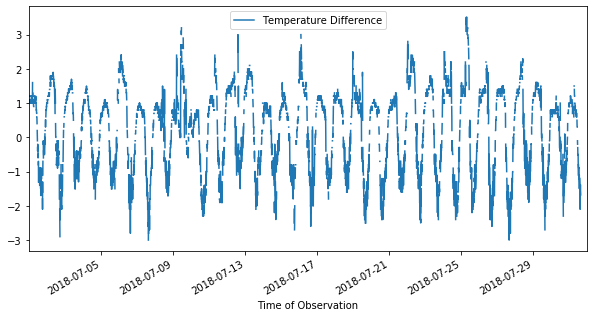

In [22]:
data.plot('Time of Observation','Temperature Difference',figsize=(10,5))

Filtering Data
--------------

Another common task that we would do with a dataset is filtering. Pandas makes this easy to do with the use of common comparison operators. Let's look at data when the 
sea level pressure was high. First, I'll again, need to covert the column to float.

In [23]:
data['Sea Level Pressure'] = data['Sea Level Pressure'].astype(float)
data['Wind Speed'] = data['Wind Speed'].astype(float)

highpressure = data.loc[data['Sea Level Pressure'] > 1020]
print(highpressure.count())

Identification                          74
Latitude                                74
Longitude                               74
Time of Observation                     74
Ice Accretion On Ship                    0
Thickness of Ice Accretion On Ship       0
Rate of Ice Accretion on Ship            0
Sea Level Pressure                      74
Characteristics of Pressure Tendency     0
Pressure Tendency                        0
Air Temperature                         74
Wet Bulb Temperature                     0
Dew Point Temperature                    0
Sea Surface Temperature                  0
Wave Direction                           0
Wave Period                              0
Wave Height                              0
Swell Direction                          0
Swell Period                             0
Swell Height                             0
Total Cloud Amount                       0
Low Cloud Amount                         0
Low Cloud Type                           0
Cloud Heigh

The result of filtering in this way is a new dataframe that only contains data 
that matches the condition that I specified. I saved the result as a new variable. Notice how I used the `loc()` method to index the data frame. That allowed me to specifiy the 
condition by which to filter: "data['Sea Level Pressure'] > 1020". The result is a dataframe with 74 columns. Most of the rows don't have any data. But, we can see we have a nearly complete data record of the air temperature during these measurements and the wind velocity. 

We can do the same thing to look at days when the pressure was relatively low:

In [24]:
lowpressure = data.loc[data['Sea Level Pressure'] < 1016]
print(lowpressure.count())

Identification                          44
Latitude                                44
Longitude                               44
Time of Observation                     44
Ice Accretion On Ship                    0
Thickness of Ice Accretion On Ship       0
Rate of Ice Accretion on Ship            0
Sea Level Pressure                      44
Characteristics of Pressure Tendency     0
Pressure Tendency                        0
Air Temperature                         44
Wet Bulb Temperature                     0
Dew Point Temperature                    0
Sea Surface Temperature                  0
Wave Direction                           0
Wave Period                              0
Wave Height                              0
Swell Direction                          0
Swell Period                             0
Swell Height                             0
Total Cloud Amount                       0
Low Cloud Amount                         0
Low Cloud Type                           0
Cloud Heigh

Again, I created a new dataframe here. Using filtering, we can quickly look to see if there are any interesting trends in the data.

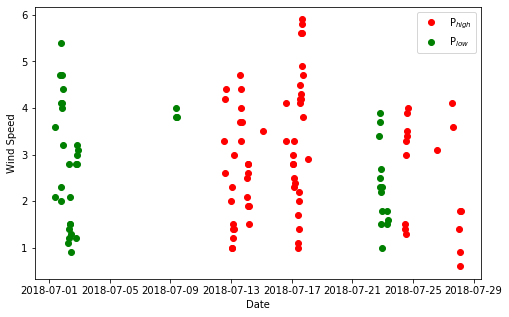

In [25]:
from matplotlib import pyplot as pp
pp.figure(figsize=(8,5))
pp.plot('Time of Observation','Wind Speed',data=highpressure,color='red',marker='o',linestyle='None',label=r'P$_{high}$')
pp.plot('Time of Observation','Wind Speed',data=lowpressure,color='green',marker='o',linestyle='None',label=r'P$_{low}$')
pp.ylabel('Wind Speed')
pp.xlabel('Date')
pp.legend(loc="upper right")
pp.show()

I needed to use the `data` keyword and give the name of the relevant data frame in my call to `pp.plot()` here because I wanted to lines on a single plot. This is slightly more 
complex than the plot earlier where I was able to use the `plot` method of the data frame 
it self (e.g. data.plot()), but still, we are able to pretty quickly get a plot of the relevant data. In this case, we might conclude that the high and low pressures occurred during isolated longer term weather events, but that wind direction wasn't necessarily correlated to those events.

Another way to filter data is by value. As an example, let's take a look at the wind direction data:

In [26]:
data['Wind Direction'] = data['Wind Direction'].astype(float)
print(data['Wind Direction'].head())

0    40.0
1    40.0
2    30.0
3    50.0
4    41.0
Name: Wind Direction, dtype: float64


I wonder if the wind direction was ever exactly 70 or 80 degrees?

In [27]:
data['Wind Direction'].isin([70,80])

0       False
1       False
2       False
3       False
4       False
        ...  
7378    False
7379    False
7380    False
7381    False
7382    False
Name: Wind Direction, Length: 7383, dtype: bool

The `isin()` method checks to see if a specific value(s) *is in* the specified column. If it is, then a True is returned, else, False. This is most useful when used to index the data frame itself. Here, I'll use the `isin()` method to grab only the rows when the wind direction was 70 or 80 degrees, and then use the `loc` attribue to print just wind direction and temperature difference. 

In [28]:
data[data['Wind Direction'].isin([70,80])].loc[:,['Wind Direction','Temperature Difference']]

,Wind Direction,Temperature Difference
34,70.0,1.1
44,80.0,1.0
46,70.0,1.6
65,70.0,1.0
67,70.0,1.1
...,...,...
7291,70.0,0.7
7296,70.0,0.6
7299,70.0,0.5
7312,70.0,NaN


In this way, we can filter the data in a variety of ways so that we extract only the 
exact data that we want. Note that we also see that there are 1976 observations when the wind direction was exactly 70 or 80 degrees. 

There is a lot more that we can do with pandas Series and DataFrames. However, the tools covered in this lesson and the previous one should be enough to get you started doing many common data analysis tasks. 